In [1]:
!pip install pandas
!pip install numpy 
!pip install -U scikit-learn
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/content/diabetes.csv')

StandardScaler = StandardScaler()
columns_to_scale = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI' , 'DiabetesPedigreeFunction', 'Age']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [5]:
df.shape

(768, 9)

In [6]:
# df['zscore'] = ( df.Insulin - df.Insulin.mean() ) / df.Insulin.std()
# df[df['zscore']>2 && df['zscore]<-2]
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
print('X_train -', X_train.size)
print('X_test -', X_test.size)
print('y_train -', y_train.size)
print('y_test -', y_test.size)

X_train - 4296
X_test - 1848
y_train - 537
y_test - 231


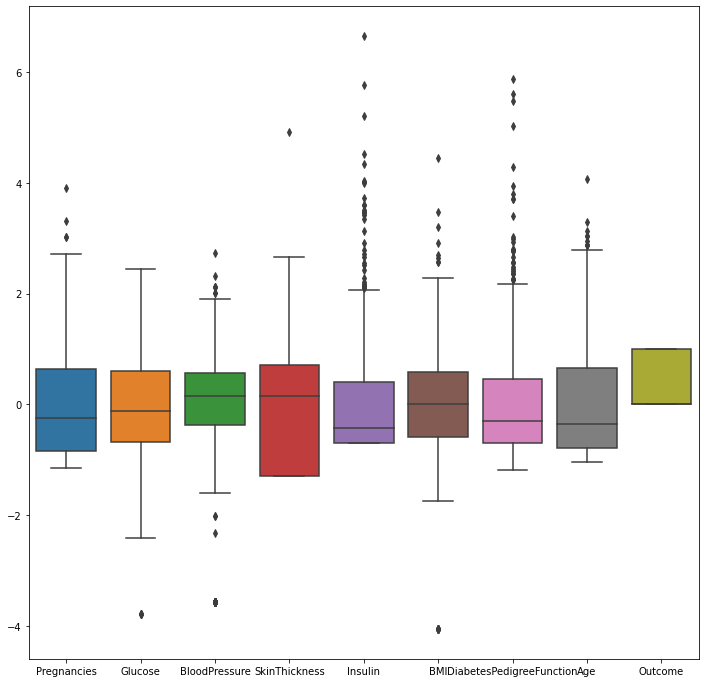

In [9]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df)

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

dt = DecisionTreeClassifier()
SVM = svm.SVC()
knn = KNeighborsClassifier(n_neighbors=15)
lr = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier()
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

DECISION TREE CLASSIFIER

Testing Accuracy :  0.670995670995671
Testing Precision :  0.773972602739726


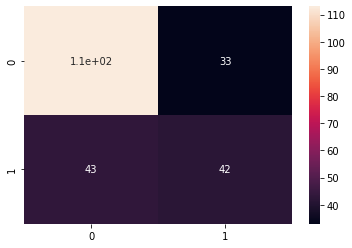

In [12]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

dt_model = dt.fit(X_train,y_train)
dt_prediction = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test,dt_prediction)

sns.heatmap(cm_dt, annot=True, cmap = 'rocket' )
TP = cm_dt[0][0]
TN = cm_dt[1][1]
FN = cm_dt[1][0]
FP = cm_dt[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

LOGISTIC REGRESSION

Testing Accuracy :  0.7835497835497836
Testing Precision :  0.9041095890410958


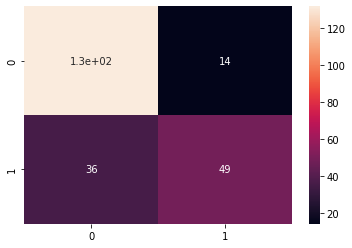

In [13]:
lr_model = lr.fit(X_train,y_train)
lr_prediction = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test,lr_prediction)

sns.heatmap(cm_lr, annot=True, cmap = 'rocket' )
TP = cm_lr[0][0]
TN = cm_lr[1][1]
FN = cm_lr[1][0]
FP = cm_lr[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

SUPPORT VECTOR MACHINE

Testing Accuracy :  0.7965367965367965
Testing Precision :  0.9246575342465754


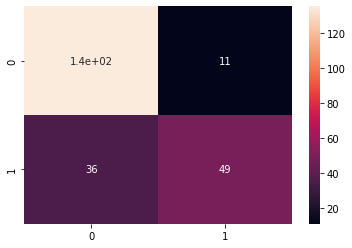

In [14]:
svm_model = SVM.fit(X_train,y_train)
svm_prediction = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test,svm_prediction)

sns.heatmap(cm_svm, annot=True, cmap = 'rocket' )
TP = cm_svm[0][0]
TN = cm_svm[1][1]
FN = cm_svm[1][0]
FP = cm_svm[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

k NEAREST NEIGHBOR CLASSIFIER


Testing Accuracy :  0.7878787878787878
Testing Precision :  0.9041095890410958


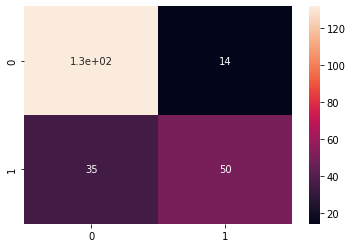

In [15]:
knn_model = knn.fit(X_train,y_train)
knn_prediction = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test,knn_prediction)

sns.heatmap(cm_knn, annot=True, cmap = 'rocket' )
TP = cm_knn[0][0]
TN = cm_knn[1][1]
FN = cm_knn[1][0]
FP = cm_knn[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))




GAUSSIAN NAIVE BAYES 



Testing Accuracy :  0.7835497835497836
Testing Precision :  0.8767123287671232


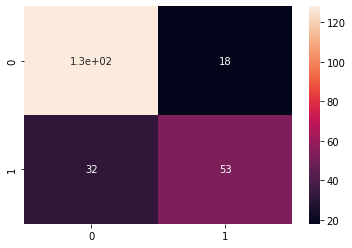

In [16]:
nb_model = nb.fit(X_train,y_train)
nb_prediction = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test,nb_prediction)

sns.heatmap(cm_nb, annot=True, cmap = 'rocket' )
TP = cm_nb[0][0]
TN = cm_nb[1][1]
FN = cm_nb[1][0]
FP = cm_nb[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))


RANDOM FOREST CLASSIFIER

Testing Accuracy :  0.7922077922077922
Testing Precision :  0.8904109589041096


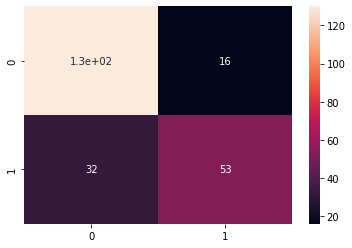

In [17]:
rf_model = rf.fit(X_train,y_train)
rf_prediction = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test,rf_prediction)

sns.heatmap(cm_rf, annot=True, cmap = 'rocket' )
TP = cm_rf[0][0]
TN = cm_rf[1][1]
FN = cm_rf[1][0]
FP = cm_rf[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))



NEURAL NETWORK

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Testing Accuracy :  0.7748917748917749
Testing Precision :  0.821917808219178


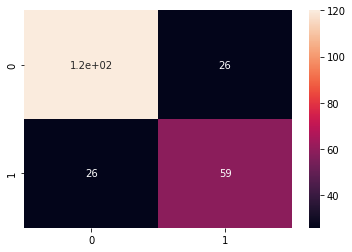

In [18]:
nn_model = nn.fit(X_train,y_train)
nn_prediction = nn_model.predict(X_test)

cm_nn = confusion_matrix(y_test,nn_prediction)

sns.heatmap(cm_nn, annot=True, cmap = 'rocket' )
TP = cm_nn[0][0]
TN = cm_nn[1][1]
FN = cm_nn[1][0]
FP = cm_nn[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))